In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
dogTweets = pd.read_csv('dog_rates_tweets.csv', parse_dates=True).set_index(keys=['id'])

In [2]:
dogTweetsText = dogTweets['text']
pattern = r'(\d+(\.\d+)?)\/10'
dogTweetsRatings = dogTweetsText.str.extract(pattern, expand=False)
dogBool = dogTweetsRatings[0].notnull()

In [3]:
dogTweets['thereisrating'] = dogBool
dogTweets['ratings'] = dogTweetsRatings[0]
dogTweets = dogTweets.reset_index()
filteredDogTweets = dogTweets[dogTweets['thereisrating'] == True]
ratingsint = pd.to_numeric(filteredDogTweets['ratings'])

In [4]:
filteredDogTweets['ratings']= ratingsint
filteredBigDogs = filteredDogTweets[filteredDogTweets['ratings'] < 20]

/Users/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
filteredBigDogs['created_at'] = pd.to_datetime(filteredBigDogs['created_at'])

/Users/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


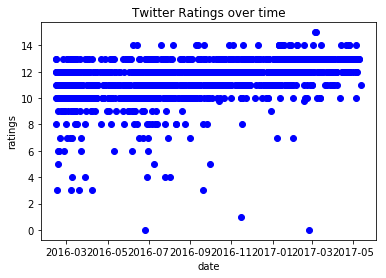

In [6]:
plt.title('Twitter Ratings over time')
plt.xlabel('date')
plt.ylabel('ratings')
plt.plot(filteredBigDogs['created_at'].values, filteredBigDogs['ratings'].values, 'bo')
plt.show()

In [7]:
def to_timestamp(datetime):
    return datetime.timestamp()
    

In [8]:
filteredBigDogs['timestamp'] = filteredBigDogs['created_at'].apply(to_timestamp)

/Users/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
fit = stats.linregress(filteredBigDogs['timestamp'], filteredBigDogs['ratings'])

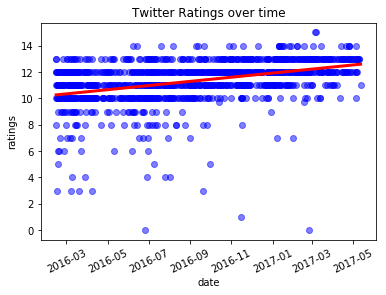

In [10]:
plt.title('Twitter Ratings over time')
plt.xlabel('date')
plt.ylabel('ratings')
plt.xticks(rotation=25)
plt.plot(filteredBigDogs['created_at'].values, filteredBigDogs['ratings'].values, 'bo', alpha=0.5)
plt.plot(filteredBigDogs['created_at'].values, filteredBigDogs['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()

In [11]:
x = filteredBigDogs['created_at'].values
X = x[:, np.newaxis]
y = filteredBigDogs['ratings'].values
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print(model.coef_, model.intercept_)

[  5.96384520e-17] -76.5370560988


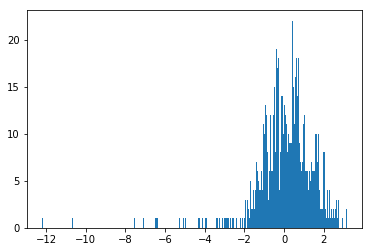

In [12]:
residuals = y - model.predict(X.tolist())
plt.hist(residuals, 500)
plt.show()

In [13]:
import seaborn
seaborn.set()

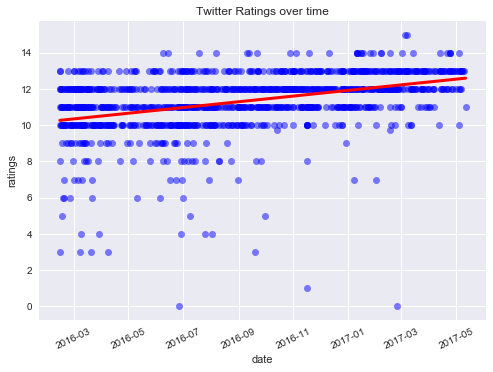

In [14]:
plt.title('Twitter Ratings over time')
plt.xlabel('date')
plt.ylabel('ratings')
plt.xticks(rotation=25)
plt.plot(filteredBigDogs['created_at'].values, filteredBigDogs['ratings'].values, 'bo', alpha=0.5)
plt.plot(filteredBigDogs['created_at'].values, filteredBigDogs['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()

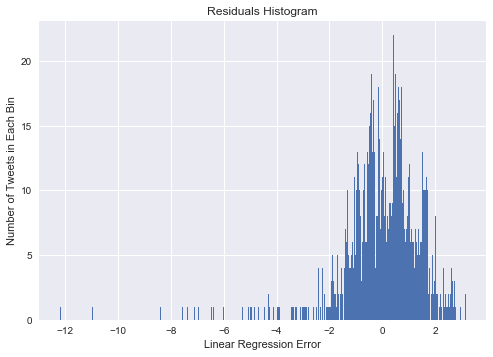

In [17]:
residuals = y - model.predict(X.tolist())
plt.hist(residuals, 500)
plt.xlabel('Linear Regression Error')
plt.ylabel('Number of Tweets in Each Bin')
plt.title('Residuals Histogram')
plt.show()